In [9]:
import numpy as np
import scipy.special
#神经网络
class neuralnetwork:

    #初始化网络（设置输入层，隐藏层，输出层数目以及学习率）
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inputnodes = inputnodes
        self.hiddennodes = hiddennodes
        self.outputnodes = outputnodes
        self.learningrate = learningrate
    #初始化权重值(生成-0.5 到 0.5 之间的随机权重)
        #self.weight_input_hidden  = np.random.rand(inputnodes,hiddennodes)- 0.5
        #self.weight_hidden_output = np.random.rand(hiddennodes,outputnodes)- 0.5
        #以上为简单的生成随机数的方法，下面为更为复杂的一种随机数生成方法
        #使用正态分布概率分布采样权重，其中的平均值为0，标准差为加点连接数目的开方
        self.weight_input_hidden  = np.random.normal(0.0 ,pow(self.hiddennodes,-0.5),(hiddennodes,inputnodes))
        self.weight_hidden_output = np.random.normal(0.0 ,pow(self.outputnodes,-0.5),(outputnodes,hiddennodes))
        #sigmoid函数定义
        self.sigmoid = lambda x : scipy.special.expit(x)
    def train(self,inputs_list,targets_list):
        inputs  = np.array(inputs_list ,ndmin = 2).T
        targets = np.array(targets_list,ndmin = 2).T
        #计算隐藏层的输入
        hidden_inputs  = np.dot(self.weight_input_hidden,inputs)
        #计算隐藏层的输出
        hidden_outputs = self.sigmoid(hidden_inputs)
        #计算输出层的输入
        output_inputs = np.dot(self.weight_hidden_output,hidden_outputs)
        #计算输出层的输出
        output_outputs = self.sigmoid(output_inputs)
        #计算输出层误差
        output_errors  = targets - output_outputs
        #计算隐层误差
        hidden_errors  = np.dot(self.weight_hidden_output.T ,output_errors)
        #梯度下降方法更新权重
        self.weight_hidden_output +=  self.learningrate*np.dot((output_errors*output_outputs*(1.0-output_outputs)),hidden_outputs.T)
        self.weight_input_hidden  +=  self.learningrate*np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),inputs.T)
    def query(self,inputs_list):
        inputs = np.array(inputs_list,ndmin = 2).T
        #计算隐藏层的输入
        hidden_inputs  = np.dot(self.weight_input_hidden,inputs)
        #计算隐藏层的输出
        hidden_outputs = self.sigmoid(hidden_inputs)
        #计算输出层的输入
        output_inputs = np.dot(self.weight_hidden_output,hidden_outputs)
        #计算输出层的输出
        output_outputs = self.sigmoid(output_inputs)        
        return output_outputs
        

In [4]:
#将MNIST原数据转换为CSV格式数据
# def convert(imgf, labelf, outf, n):
#     f = open(imgf, "rb")
#     o = open(outf, "w")
#     l = open(labelf, "rb")

#     f.read(16)
#     l.read(8)
#     images = []

#     for i in range(n):
#         image = [ord(l.read(1))]
#         for j in range(28*28):
#             image.append(ord(f.read(1)))
#         images.append(image)

#     for image in images:
#         o.write(",".join(str(pix) for pix in image)+"\n")
#     f.close()
#     o.close()
#     l.close()

# convert("train-images.idx3-ubyte", "train-labels.idx1-ubyte",
#         "mnist_train1.csv", 60000)
# convert("t10k-images.idx3-ubyte", "t10k-labels.idx1-ubyte",
#         "mnist_test1.csv", 10000)

In [10]:
#打开数据文件，读入数据
data_file = open('mnist_train1.csv','r')
data_list = data_file.readlines()
data_file.close()

In [61]:
#根据数据集中的数据训练神经网络
import numpy as np
import matplotlib.pyplot as plt

input_nodes   = 784
hidden_nodes  = 100
output_nodes  = 10
learning_rate = 0.5

n = neuralnetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

for data in data_list:
    values = data.split(',')
    image_data = np.asfarray(values[1:])
    inputs = (image_data/255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(values[0])] = 0.99
    n.train(inputs,targets)

In [28]:
#打开测试数据文件，读入数据
test_file = open('mnist_test1.csv','r')
test_list = test_file.readlines()
test_file.close()

In [42]:
#根据测试集来判断该数字
test = test_list[10].split(',')
n.query(np.asfarray(test[1:]))
output_neuralnetwork = np.argmax(n.query(np.asfarray(test[1:])))
output_neuralnetwork

0

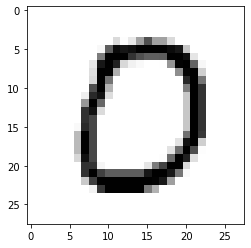

In [41]:
#目标数字
test  = test_list[10].split(',')
image = np.asfarray(test[1:]).reshape((28,28))
plt.imshow(image,cmap='Greys',interpolation='None')

In [62]:
#计算神经网络的正确率
scorecard = []
for test_data in test_list:
    output_target = int(test_data.split(',')[0])
    output_neuralnetwork = np.argmax(n.query(np.asfarray(test_data.split(',')[1:])))
    if (output_target == output_neuralnetwork):
        scorecard.append(1)
    else:
        scorecard.append(0)

In [63]:
scorecard_array = np.asarray(scorecard)
scorecard_array.sum()/10000

0.9115